In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from pathlib import Path

In [2]:
data_dir = Path('./converted_recent_ls_data/NDVI')
print(f"Data dir exists: {data_dir.exists()}")
data_files = [f for f in data_dir.iterdir()]
print(f"Found {len(data_files)} data files")

Data dir exists: True
Found 51 data files


In [3]:
src_files_to_mosaic = []

for f in data_files:
    src = rasterio.open(f)
    src_files_to_mosaic.append(src)

    



In [4]:
mosaic, out_trans = merge(src_files_to_mosaic)
fig, ax = plt.subplots()
show(mosaic, cmap='viridis')

KeyboardInterrupt: 

In [7]:
out_meta = src.meta.copy()
meta_data = {"driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "crs": 'EPSG:4326'}
    
out_meta.update(meta_data)

In [8]:
with rasterio.open("mosaic.tiff", "w", **out_meta) as dest:
    dest.write(mosaic)

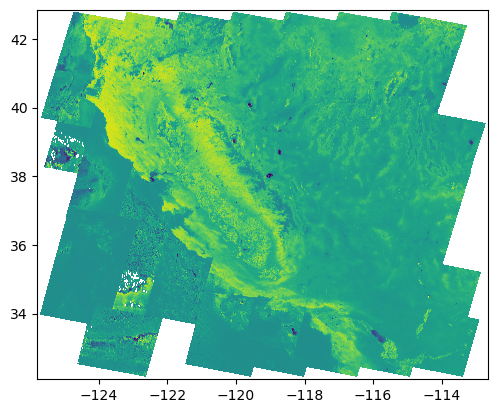

<Axes: >

In [5]:

# read in mosaic.tiff

mosaic = rasterio.open("mosaic.tiff")
show(mosaic, cmap='viridis')